In [1]:
import sys
sys.path.append('C:\\0_Academy\\VScode\\00_Function\\')
import datetime
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#read file
from A1_read_data import read_csv_data
folder = '1.1 ALL windspeed/'
file_name = 'WIND_95m_1605-1912.csv'
data = read_csv_data(folder,file_name)

Import 'WIND_95m_1605-1912.csv'Done


In [3]:
data02 = data[['DateTime','WS95','WD95n']].copy()
data02['Year']   = data['DateTime'].apply(lambda x: x.year)
data02['Month']  = data['DateTime'].apply(lambda x: x.month)
seasons = [(month%12 + 3)//3 for month in range(1, 13)]
month_to_season = dict(zip(range(1,13), seasons))
data02['Season']= data02['Month'].apply(lambda x:month_to_season[x])
Season_dict = {1:'Winter',2:'Spring',3:'Summer',4:'Autumn'}
data02['Seasons'] = data02['Season'].apply(lambda x:Season_dict[x])
#data01['Monsoon']= data01['Month'].isin([1,2,3,10,11,12]) 

In [4]:
import seaborn as sns
from A3_select_data import DataRange
data02 = DataRange(data02,"2017-01-01", "2020-01-01")

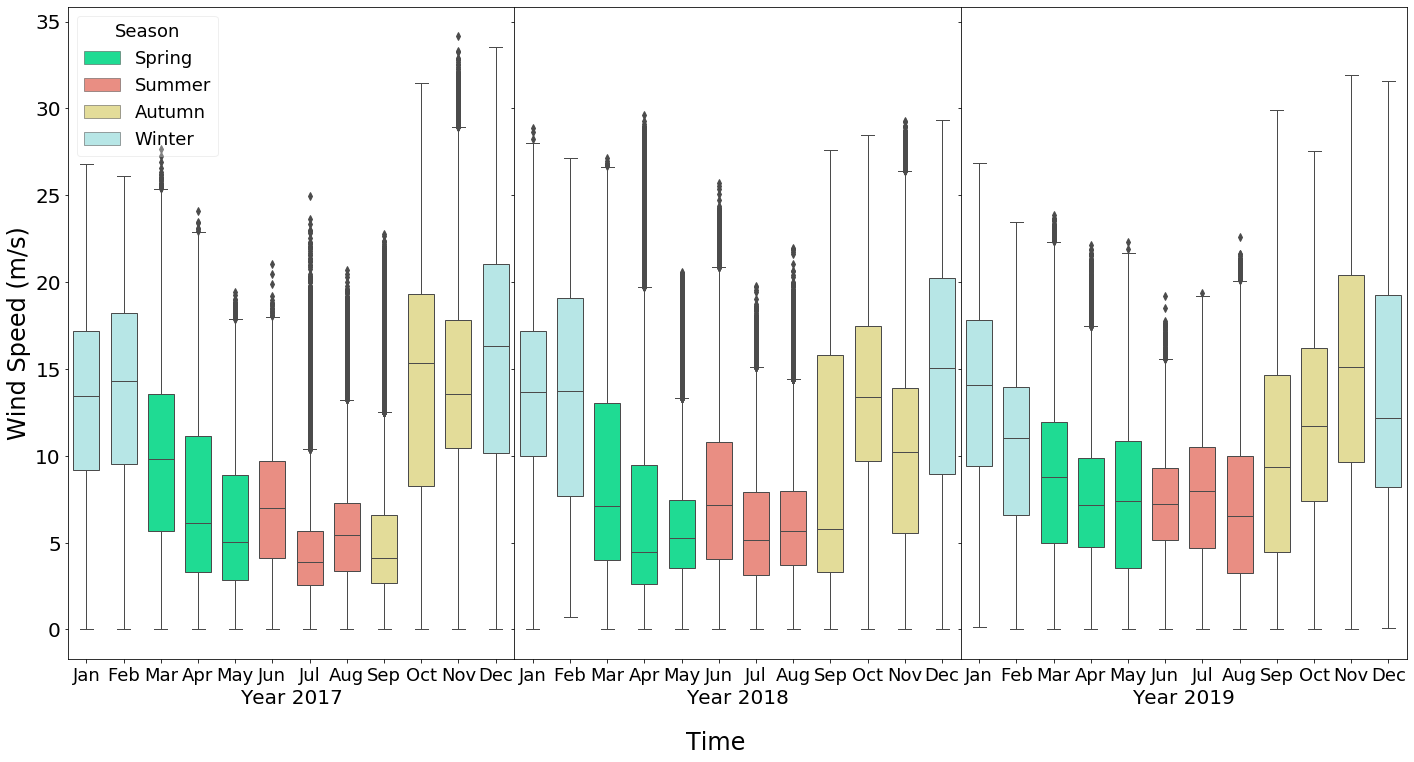

In [5]:
m_name = ['Jan' ,'Feb','Mar','Apr',
           'May' ,'Jun','Jul','Aug',
           'Sep' ,'Oct','Nov','Dec']
colors = ["mediumspringgreen",'salmon','khaki',"paleturquoise"]
seasons=['Spring','Summer','Autumn','Winter']
year = [2017,2018,2019]
sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(1,len(year),sharey=True, figsize=(24, 12), gridspec_kw = {'wspace':0, 'hspace':0})
for i in range(len(year)):
    box_plot = data02[data02['Year'] ==year[i]]
    sns.boxplot(x="Month", y="WS95",data=box_plot,hue="Seasons", width=0.7,linewidth=1,
                hue_order=seasons,
                dodge=False,ax=ax[i])
    ax[i].tick_params(axis="x", labelsize=18)
    xk = data02['Month'].unique() -1
    ax[i].set_xticks(xk)
    ax[i].set_xticklabels(m_name)
    ax[i].set_xlabel("Year {}".format(year[i]), fontsize=20)
    
ax[0].set_ylabel("Wind Speed (m/s)", fontsize=24)
ax[0].tick_params(axis="y", labelsize=20)
ax[0].legend(loc=2,title="Season",title_fontsize=18,fontsize=18,fancybox=True, framealpha=0.3)
#ax[0].legend(label_order = ['0','-1','-2'])
ax[1].get_legend().remove()
ax[1].set_ylabel('')
ax[2].get_legend().remove()
ax[2].set_ylabel('')
fig.text(0.5, 0.02, 'Time', ha='center',size=24)

plt.show()

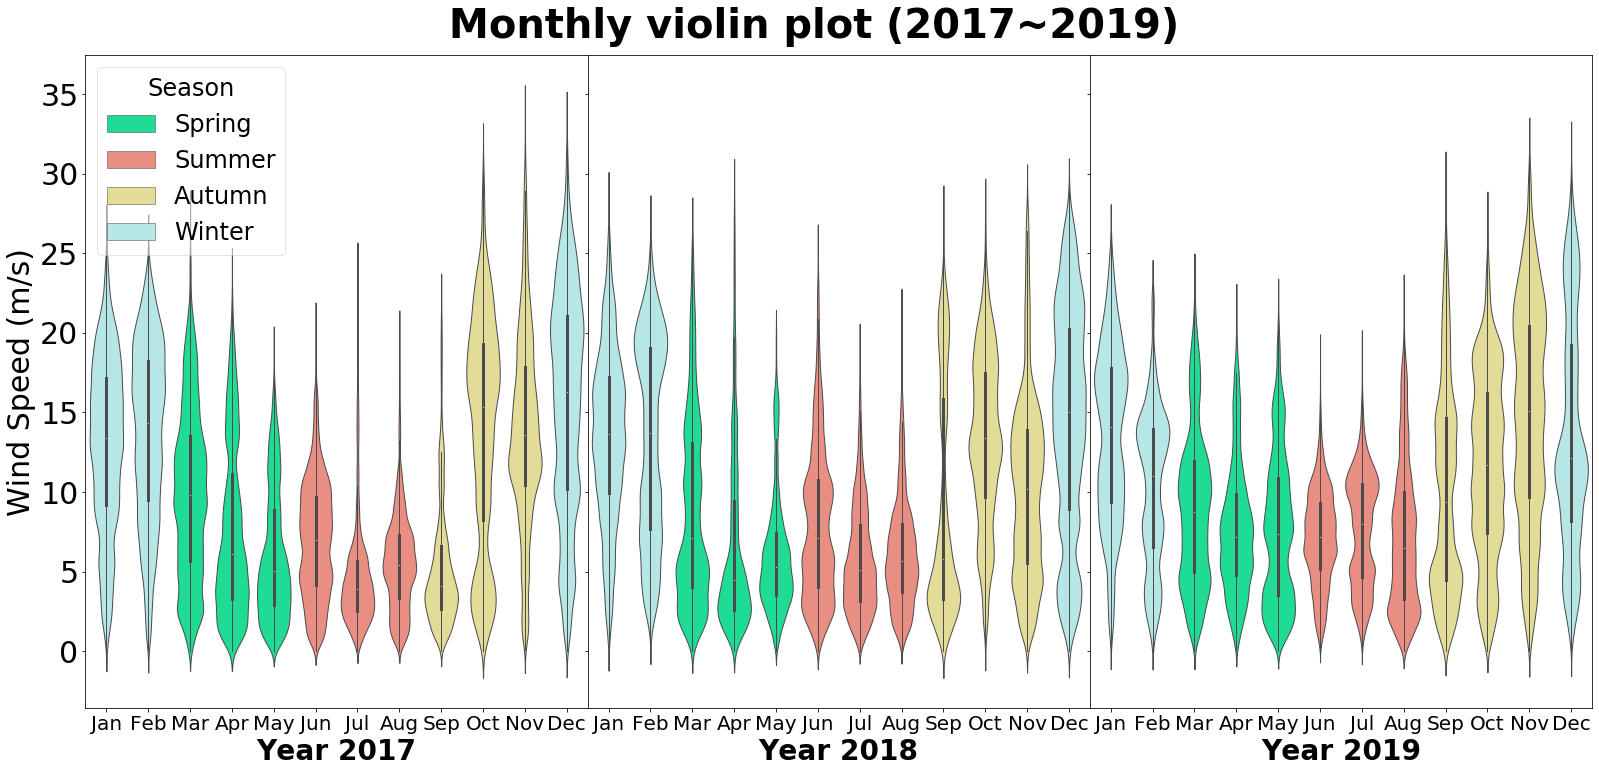

In [8]:
m_name = ['Jan' ,'Feb','Mar','Apr',
           'May' ,'Jun','Jul','Aug',
           'Sep' ,'Oct','Nov','Dec']
colors = ["mediumspringgreen",'salmon','khaki',"paleturquoise"]
seasons=['Spring','Summer','Autumn','Winter']
year = [2017,2018,2019]
sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(1,len(year),sharey=True, figsize=(27, 12), gridspec_kw = {'wspace':0, 'hspace':0})
for i in range(len(year)):
    box_plot = data02[data02['Year'] ==year[i]]
    sns.violinplot(x="Month", y="WS95",data=box_plot,hue="Seasons", width=0.8,linewidth=1,
                hue_order=seasons,
                dodge=False,ax=ax[i])
    ax[i].tick_params(axis="x", labelsize=20)
    xk = data02['Month'].unique() -1
    ax[i].set_xticks(xk)
    ax[i].set_xticklabels(m_name)
    ax[i].set_xlabel("Year {}".format(year[i]), fontsize=28, fontweight='bold')
    
ax[0].set_ylabel("Wind Speed (m/s)", fontsize=30)
ax[0].tick_params(axis="y", labelsize=30)
ax[0].legend(loc=2,title="Season",title_fontsize=24,fontsize=24,fancybox=True, framealpha=0.5)

ax[1].get_legend().remove()
ax[1].set_ylabel('')
ax[2].get_legend().remove()
ax[2].set_ylabel('')
#fig.text(0.5, 0.03, 'Time', ha='center',size=30)
fig.text(0.5, 0.9, 'Monthly violin plot (2017~2019)', ha='center',fontweight='bold',size=40)
plt.show()

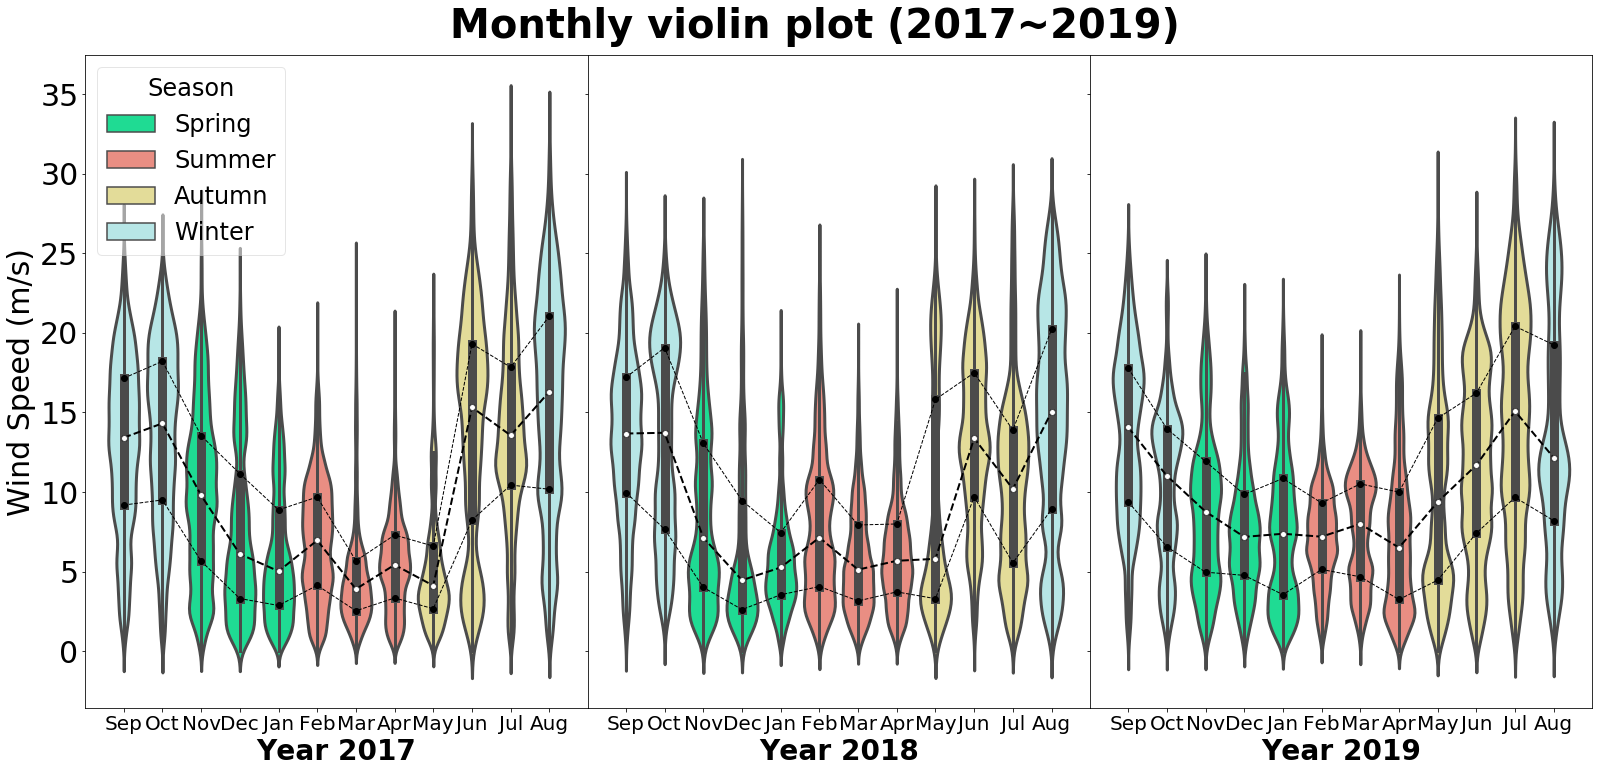

In [5]:
m_name = ['Jan' ,'Feb','Mar','Apr',
           'May' ,'Jun','Jul','Aug',
           'Sep' ,'Oct','Nov','Dec']
colors = ["mediumspringgreen",'salmon','khaki',"paleturquoise"]
seasons=['Spring','Summer','Autumn','Winter']
year = [2017,2018,2019]
sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(1,len(year),sharey=True, figsize=(27, 12), gridspec_kw = {'wspace':0, 'hspace':0})
for i in range(len(year)):
    df_plot = data02[data02['Year'] ==year[i]]
    sns.violinplot(x="Month", y="WS95",data=df_plot,hue="Seasons", width=0.8,linewidth=3,
                hue_order=seasons,
                dodge=False,ax=ax[i])
    
    d1=df_plot.groupby('Month')['WS95'].quantile(q=0.25)
    d2=df_plot.groupby('Month')['WS95'].quantile(q=0.5)
    d3=df_plot.groupby('Month')['WS95'].quantile(q=0.75)
    ax[i].plot(d1.values, color='black', marker='o', linestyle='dashed',linewidth=1)
    ax[i].plot(d2.values, color='black', marker='o', linestyle='dashed',linewidth=2)
    ax[i].plot(d3.values, color='black', marker='o', linestyle='dashed',linewidth=1)
    ax[i].tick_params(axis="x", labelsize=20)
    xk = data02['Month'].unique() -1
    ax[i].set_xticks(xk)
    ax[i].set_xticklabels(m_name)
    ax[i].set_xlabel("Year {}".format(year[i]), fontsize=28, fontweight='bold')
    
ax[0].set_ylabel("Wind Speed (m/s)", fontsize=30)
ax[0].tick_params(axis="y", labelsize=30)
ax[0].legend(loc=2,title="Season",title_fontsize=24,fontsize=24,fancybox=True, framealpha=0.5)

ax[1].get_legend().remove()
ax[1].set_ylabel('')
ax[2].get_legend().remove()
ax[2].set_ylabel('')
#fig.text(0.5, 0.03, 'Time', ha='center',size=30)
fig.text(0.5, 0.9, 'Monthly violin plot (2017~2019)', ha='center',fontweight='bold',size=40)
plt.show()

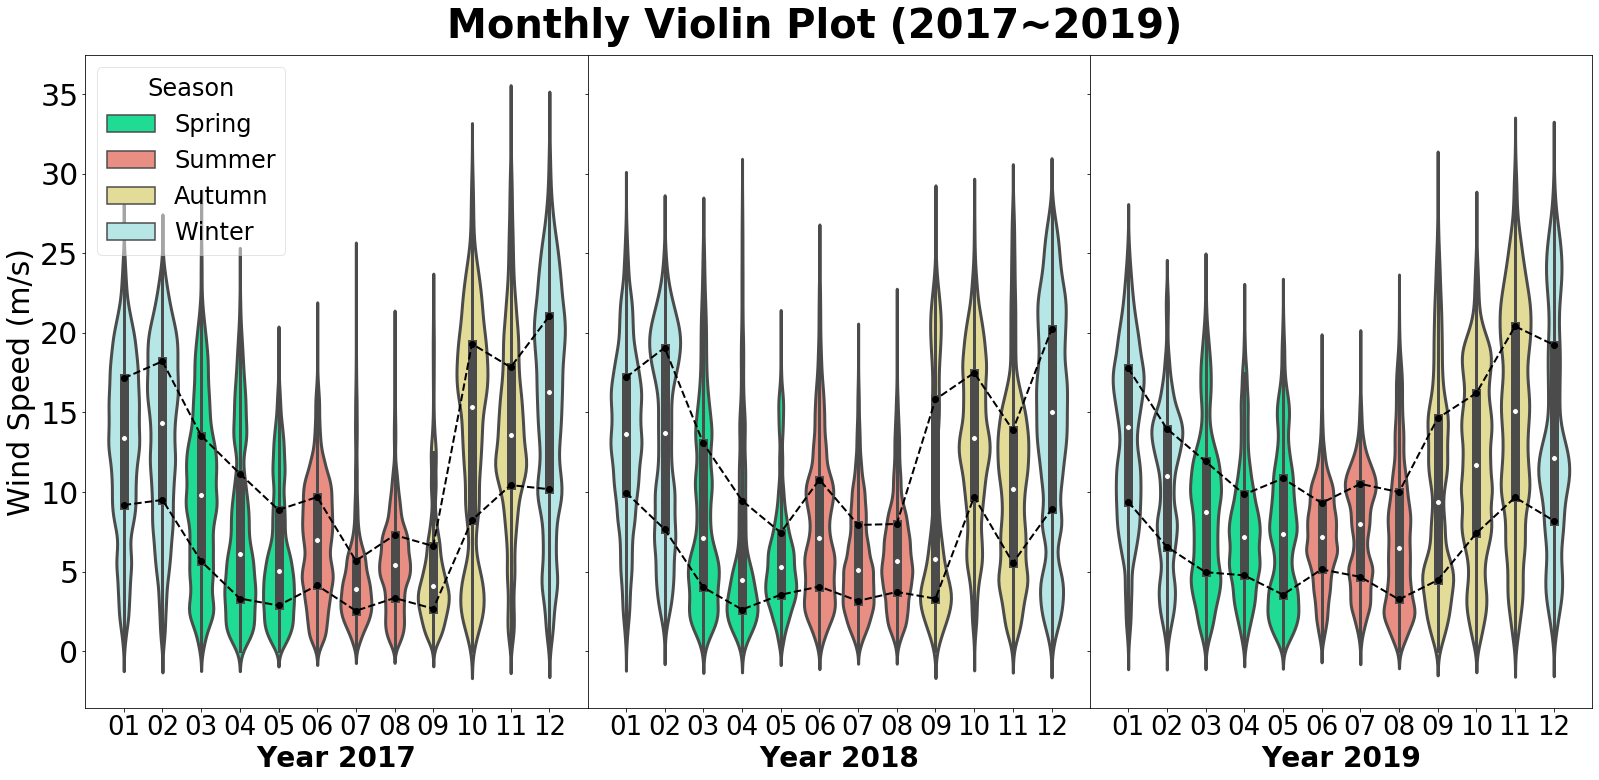

In [14]:
m_name = ["01","02","03","04","05","06","07","08","09","10","11","12"]
colors = ["mediumspringgreen",'salmon','khaki',"paleturquoise"]
seasons=['Spring','Summer','Autumn','Winter']
year = [2017,2018,2019]
sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(1,len(year),sharey=True, figsize=(27, 12), gridspec_kw = {'wspace':0, 'hspace':0})
for i in range(len(year)):
    df_plot = data02[data02['Year'] ==year[i]]
    sns.violinplot(x="Month", y="WS95",data=df_plot,hue="Seasons", width=0.8,linewidth=3,
                hue_order=seasons,
                dodge=False,ax=ax[i])
    
    d1=df_plot.groupby('Month')['WS95'].quantile(q=0.25)
    d2=df_plot.groupby('Month')['WS95'].quantile(q=0.5)
    d3=df_plot.groupby('Month')['WS95'].quantile(q=0.75)
    ax[i].plot(d1.values, color='black', marker='o', linestyle='dashed',linewidth=2)
    #ax[i].plot(d2.values, color='black', marker='o', linestyle='dashed',linewidth=2)
    ax[i].plot(d3.values, color='black', marker='o', linestyle='dashed',linewidth=2)
    ax[i].tick_params(axis="x", labelsize=26)
    xk = data02['Month'].unique() -1
    ax[i].set_xticks(xk)
    ax[i].set_xticklabels(m_name)
    ax[i].set_xlabel("Year {}".format(year[i]), fontsize=28, fontweight='bold')
    
ax[0].set_ylabel("Wind Speed (m/s)", fontsize=30)
ax[0].tick_params(axis="y", labelsize=30)
ax[0].legend(loc=2,title="Season",title_fontsize=24,fontsize=24,fancybox=True, framealpha=0.5)

ax[1].get_legend().remove()
ax[1].set_ylabel('')
ax[2].get_legend().remove()
ax[2].set_ylabel('')
fig.text(0.5, 0.9, 'Monthly Violin Plot (2017~2019)', ha='center',fontweight='bold',size=40)
plt.show()

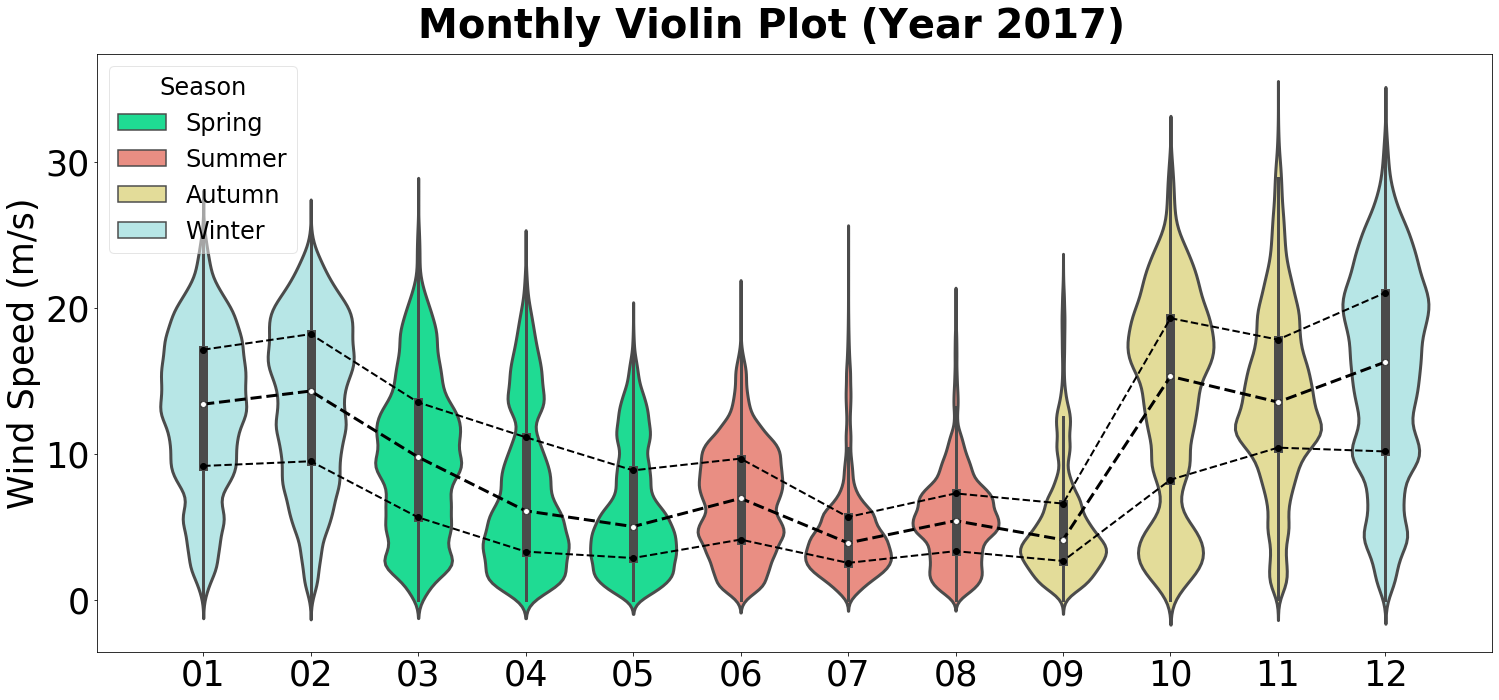

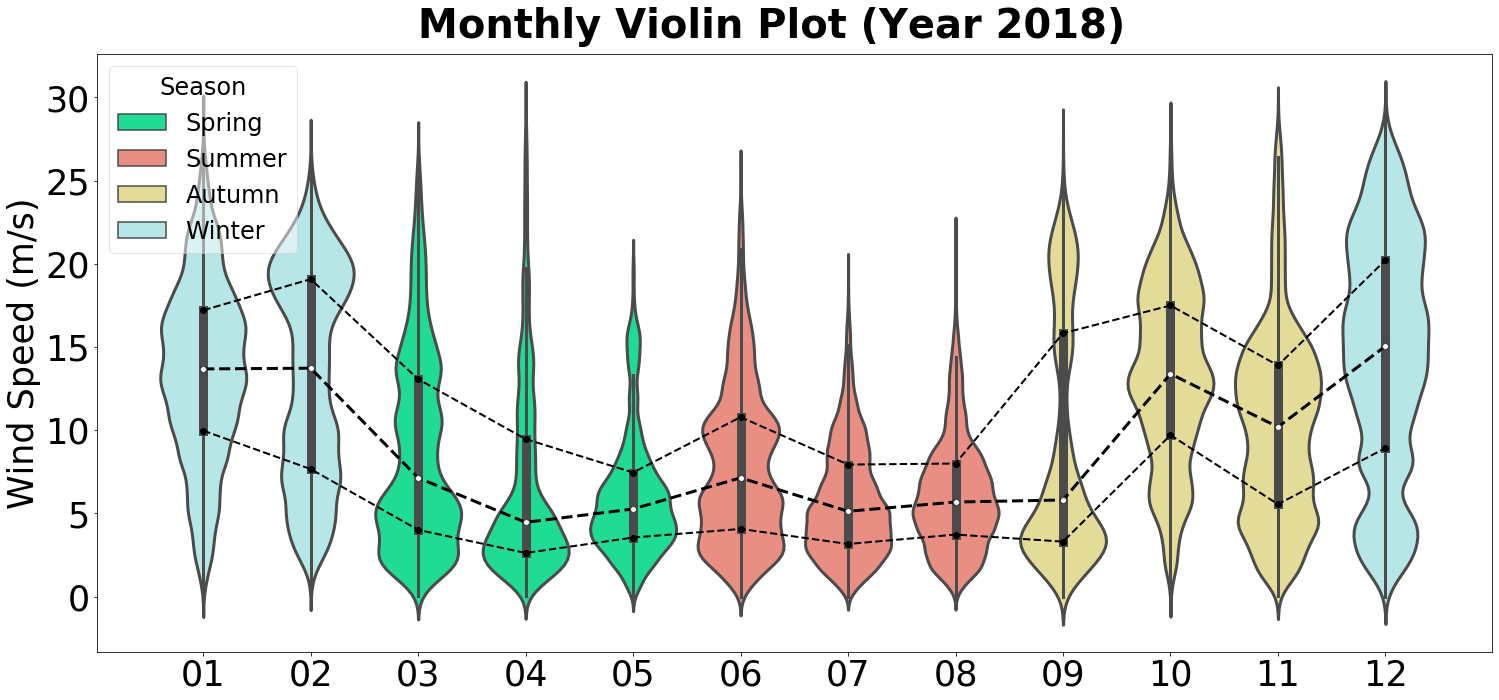

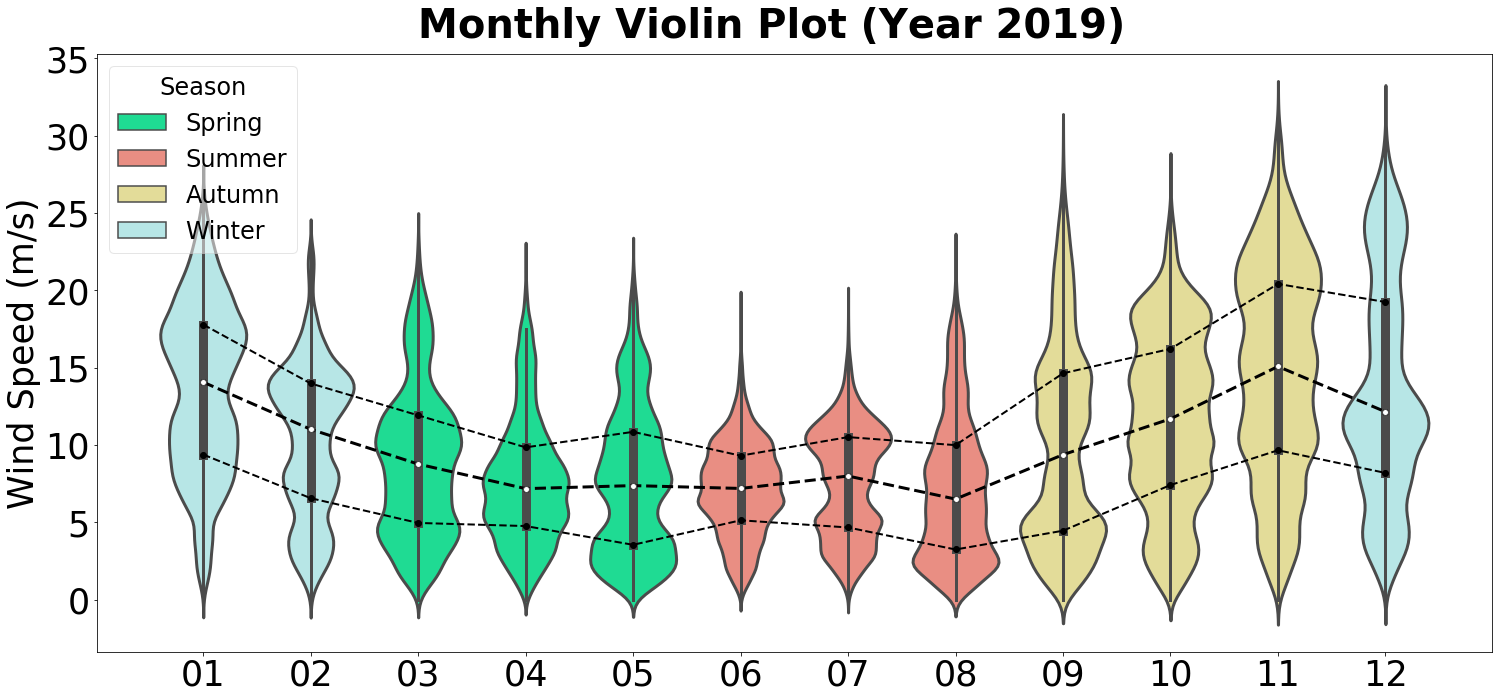

In [7]:
m_name = ["01","02","03","04","05","06","07","08","09","10","11","12"]
colors = ["mediumspringgreen",'salmon','khaki',"paleturquoise"]
seasons=['Spring','Summer','Autumn','Winter']
year = [2017,2018,2019]
sns.set_palette(sns.color_palette(colors))

for i in range(len(year)):
    fig, ax = plt.subplots(1,1,figsize=(25, 11))
    df_plot = data02[data02['Year'] ==year[i]]
    sns.violinplot(x="Month", y="WS95",data=df_plot,hue="Seasons", width=0.8,linewidth=3,
                hue_order=seasons,
                dodge=False,ax=ax)
    d1=df_plot.groupby('Month')['WS95'].quantile(q=0.25)
    d2=df_plot.groupby('Month')['WS95'].quantile(q=0.5)
    d3=df_plot.groupby('Month')['WS95'].quantile(q=0.75)
    ax.plot(d1.values, color='black', marker='o', linestyle='dashed',linewidth=2)
    ax.plot(d2.values, color='black', marker='o', linestyle='dashed',linewidth=3)
    ax.plot(d3.values, color='black', marker='o', linestyle='dashed',linewidth=2)
    ax.tick_params(axis="x", labelsize=35)
    xk = data02['Month'].unique() -1
    ax.set_xticks(xk)
    ax.set_xticklabels(m_name)
    ax.set_xlabel('')
    #ax.set_xlabel("Year {}".format(year[i]), fontsize=28, fontweight='bold')
    ax.set_ylabel("Wind Speed (m/s)", fontsize=35)
    ax.tick_params(axis="y", labelsize=35)
    ax.legend(loc=2,title="Season",title_fontsize=24,fontsize=24,fancybox=True, framealpha=0.5)
    fig.text(0.5, 0.9, 'Monthly Violin Plot (Year {})'.format(year[i]), ha='center',fontweight='bold',size=40)
    plt.show()